In [ ]:
import pandas as pd
pd.read_csv("/content/Chemical Composion of Ceramic.csv")

,Ceramic Name,Part,Na2O,MgO,Al2O3,SiO2,K2O,CaO,TiO2,Fe2O3,MnO,CuO,ZnO,PbO2,Rb2O,SrO,Y2O3,ZrO2,P2O5
0,FLQ-1-b,Body,0.62,0.38,19.61,71.99,4.84,0.31,0.07,1.18,630,10,70,10,430,0,40,80,90
1,FLQ-2-b,Body,0.57,0.47,21.19,70.09,4.98,0.49,0.09,1.12,380,20,80,40,430,-10,40,100,110
2,FLQ-3-b,Body,0.49,0.19,18.60,74.70,3.47,0.43,0.06,1.07,420,20,50,50,380,40,40,80,200
3,FLQ-4-b,Body,0.89,0.30,18.01,74.19,4.01,0.27,0.09,1.23,460,20,70,60,380,10,40,70,210
4,FLQ-5-b,Body,0.03,0.36,18.41,73.99,4.33,0.65,0.05,1.19,380,40,90,40,360,10,30,80,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,DY-M-3-g,Glaze,0.34,0.55,12.37,70.70,5.33,8.06,0.06,1.61,1250,10,90,30,250,520,30,140,690
84,DY-QC-1-g,Glaze,0.72,0.34,12.20,72.19,6.19,6.06,0.04,1.27,1700,60,110,10,270,540,40,120,630
85,DY-QC-2-g,Glaze,0.23,0.24,12.99,71.81,5.25,7.15,0.05,1.29,750,40,100,0,240,470,40,120,480
86,DY-QC-3-g,Glaze,0.14,0.46,12.62,69.16,4.34,11.03,0.05,1.20,920,40,90,20,230,470,40,130,1100


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import KBinsDiscretizer

%matplotlib inline

In [ ]:
data=pd.read_csv("/content/Chemical Composion of Ceramic.csv")
data.value_counts("Ceramic Name")

Ceramic Name
DY-BS-1-b    1
DY-BS-1-g    1
FLQ-10-b     1
FLQ-1-g      1
FLQ-1-b      1
            ..
DY-NS-4-g    1
DY-NS-4-b    1
DY-NS-3-g    1
DY-NS-3-b    1
FLQ-9-g      1
Length: 88, dtype: int64

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ceramic Name  88 non-null     object 
 1   Part          88 non-null     object 
 2   Na2O          88 non-null     float64
 3   MgO           88 non-null     float64
 4   Al2O3         88 non-null     float64
 5   SiO2          88 non-null     float64
 6   K2O           88 non-null     float64
 7   CaO           88 non-null     float64
 8   TiO2          88 non-null     float64
 9   Fe2O3         88 non-null     float64
 10  MnO           88 non-null     int64  
 11  CuO           88 non-null     int64  
 12  ZnO           88 non-null     int64  
 13  PbO2          88 non-null     int64  
 14  Rb2O          88 non-null     int64  
 15  SrO           88 non-null     int64  
 16  Y2O3          88 non-null     int64  
 17  ZrO2          88 non-null     int64  
 18  P2O5          88 non-null     in

In [ ]:
data = data.fillna(data.mean())
features=data.copy()
#features=data
features

<ipython-input-5-de006cbe8d46>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


,Ceramic Name,Part,Na2O,MgO,Al2O3,SiO2,K2O,CaO,TiO2,Fe2O3,MnO,CuO,ZnO,PbO2,Rb2O,SrO,Y2O3,ZrO2,P2O5
0,FLQ-1-b,Body,0.62,0.38,19.61,71.99,4.84,0.31,0.07,1.18,630,10,70,10,430,0,40,80,90
1,FLQ-2-b,Body,0.57,0.47,21.19,70.09,4.98,0.49,0.09,1.12,380,20,80,40,430,-10,40,100,110
2,FLQ-3-b,Body,0.49,0.19,18.60,74.70,3.47,0.43,0.06,1.07,420,20,50,50,380,40,40,80,200
3,FLQ-4-b,Body,0.89,0.30,18.01,74.19,4.01,0.27,0.09,1.23,460,20,70,60,380,10,40,70,210
4,FLQ-5-b,Body,0.03,0.36,18.41,73.99,4.33,0.65,0.05,1.19,380,40,90,40,360,10,30,80,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,DY-M-3-g,Glaze,0.34,0.55,12.37,70.70,5.33,8.06,0.06,1.61,1250,10,90,30,250,520,30,140,690
84,DY-QC-1-g,Glaze,0.72,0.34,12.20,72.19,6.19,6.06,0.04,1.27,1700,60,110,10,270,540,40,120,630
85,DY-QC-2-g,Glaze,0.23,0.24,12.99,71.81,5.25,7.15,0.05,1.29,750,40,100,0,240,470,40,120,480
86,DY-QC-3-g,Glaze,0.14,0.46,12.62,69.16,4.34,11.03,0.05,1.20,920,40,90,20,230,470,40,130,1100


In [ ]:
features.drop("Ceramic Name", axis=1, inplace=True)

In [ ]:
features.columns

Index(['Part', 'Na2O', 'MgO', 'Al2O3', 'SiO2', 'K2O', 'CaO', 'TiO2', 'Fe2O3',
       'MnO', 'CuO', 'ZnO', 'PbO2', 'Rb2O', 'SrO', 'Y2O3', 'ZrO2', 'P2O5'],
      dtype='object')

In [ ]:
features.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Part    88 non-null     object 
 1   Na2O    88 non-null     float64
 2   MgO     88 non-null     float64
 3   Al2O3   88 non-null     float64
 4   SiO2    88 non-null     float64
 5   K2O     88 non-null     float64
 6   CaO     88 non-null     float64
 7   TiO2    88 non-null     float64
 8   Fe2O3   88 non-null     float64
 9   MnO     88 non-null     int64  
 10  CuO     88 non-null     int64  
 11  ZnO     88 non-null     int64  
 12  PbO2    88 non-null     int64  
 13  Rb2O    88 non-null     int64  
 14  SrO     88 non-null     int64  
 15  Y2O3    88 non-null     int64  
 16  ZrO2    88 non-null     int64  
 17  P2O5    88 non-null     int64  
dtypes: float64(8), int64(9), object(1)
memory usage: 12.5+ KB


Используем StandardScaler() из sklearn.preprocessing для масштабирования признаков в переменной features.

Метод fit() применяется к данным, чтобы вычислить параметры масштабирования (среднее и стандартное отклонение) для каждого признака в features, за исключением столбца "Part".

StandardScaler() используется для стандартизации признаков путем удаления среднего значения и масштабирования до единичной дисперсии. fit() вычисляет параметры масштабирования (среднее и стандартное отклонение) на основе данных, которые ему предоставлены.

In [ ]:
scaler = StandardScaler()
scaler.fit(features.drop(["Part"], axis = 1))

StandardScaler()

scaler.transform(features.drop(["Part"], axis=1)) - применяет масштабирование к признакам в переменной features, исключая столбец "Part". Результаты масштабирования сохраняются в переменной scaled_features.

scaled_data = pd.DataFrame(scaled_features, columns=features.drop(["Part"], axis=1).columns) - создает новый DataFrame scaled_data из scaled_features с колонками, соответствующими признакам из features, за исключением столбца "Part". Это позволяет сохранить масштабированные данные в удобном формате DataFrame.

In [ ]:
scaled_features = scaler.transform(features.drop(["Part"], axis = 1))
scaled_data = pd.DataFrame(scaled_features, columns = features.drop(["Part"], axis = 1).columns)

x = scaled_data
y = features['Part']

x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.3)

In [ ]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 88 entries, 0 to 87
Series name: Part
Non-Null Count  Dtype 
--------------  ----- 
88 non-null     object
dtypes: object(1)
memory usage: 832.0+ bytes


Следующий код создает модель классификатора метода ближайших соседей (K-Nearest Neighbors, KNN) с числом соседей равным 1 (n_neighbors = 1). Затем эта модель обучается на обучающих данных (x_training_data и y_training_data) с помощью метода fit().

Теперь переменная model содержит обученную модель KNN, которая использует евклидово расстояние и одного ближайшего соседа для классификации данных. В данном случае, она использует масштабированные признаки из x_training_data для обучения и соответствующие метки из y_training_data.

In [ ]:
model = KNeighborsClassifier(n_neighbors = 1)
model.fit(x_training_data, y_training_data)

KNeighborsClassifier(n_neighbors=1)

Используем обученную модель KNN для предсказания меток на тестовых данных x_test_data. Затем выводится отчет о классификации с использованием функции classification_report() из библиотеки sklearn.metrics.

Функция model.predict(x_test_data) используется для предсказания меток на тестовых данных, основываясь на ранее обученной модели KNN.

classification_report(y_test_data, predictions) выводит отчет о классификации, который содержит информацию о precision (точность), recall (полнота), F1-мере и поддержке для каждого класса, а также усредненные значения по всем классам. Этот отчет полезен для оценки производительности модели на тестовом наборе данных.

In [ ]:
predictions = model.predict(x_test_data)

print(classification_report(y_test_data, predictions))

              precision    recall  f1-score   support

        Body       1.00      1.00      1.00        15
       Glaze       1.00      1.00      1.00        12

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27



model.predict_proba(x_test_data) возвращает вероятности принадлежности каждой записи из тестового набора данных к различным классам. В случае бинарной классификации это вероятности принадлежности к каждому из двух классов.

Каждая строка в массиве соответствует одной записи из тестового набора данных, а каждый столбец соответствует вероятности принадлежности к определенному классу. Например, если у вас есть три класса, каждая строка в sample будет содержать три вероятности для каждой из трех категорий.

In [ ]:
sample=model.predict_proba(x_test_data)
sample

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.]])

confusion_matrix(y_test_data, predictions) - это функция из библиотеки sklearn.metrics, которая создает матрицу ошибок (confusion matrix) для оценки производительности классификационной модели.

Матрица ошибок - это таблица, где строки представляют фактические метки, а столбцы - предсказанные метки. В каждой ячейке указывается количество образцов с определенными сочетаниями фактических и предсказанных меток.

In [ ]:
print(confusion_matrix(y_test_data, predictions))

[[15  0]
 [ 0 12]]


Фрагмент кода ниже выполняет оценку ошибки (error rate) для различных значений параметра n_neighbors в модели метода ближайших соседей.

Создается пустой список error_rates, в который будут добавляться значения ошибки для каждого значения параметра n_neighbors.

Цикл for проходит по значениям от 1 до 59 (используется np.arange(1, 60)), для каждого значения создается новая модель KNeighborsClassifier с соответствующим количеством соседей (n_neighbors = i).

Модель обучается на обучающих данных x_training_data и y_training_data.
Выполняются предсказания на тестовых данных x_test_data с использованием новой модели.

Оценка ошибки вычисляется как среднее значение логического выражения new_predictions != y_test_data, которое означает "не совпадает ли предсказание с фактической меткой?".
Значение ошибки добавляется в список error_rates.

После выполнения этого цикла error_rates будет содержать значения ошибки для n_neighbors от 1 до 24. Это позволит оценить, как количество соседей влияет на производительность модели KNN, и выбрать оптимальное значение n_neighbors с наименьшей ошибкой на тестовых данных.

In [ ]:
error_rates = []
for i in np.arange(1, 60):
    new_model = KNeighborsClassifier(n_neighbors = i)
    new_model.fit(x_training_data, y_training_data)
    new_predictions = new_model.predict(x_test_data)
    error_rates.append(np.mean(new_predictions != y_test_data))

Создаем график зависимости ошибки от количества соседей в методе ближайших соседей.

plt.plot(error_rates) - строит график, где по оси X отложены значения np.arange(1, 60) (значения n_neighbors от 1 до 60), а по оси Y - соответствующие значения ошибки из списка error_rates.

optimal = np.argmin(error_rates) - находит индекс (количество соседей), при котором достигается минимальное значение ошибки из списка error_rates с помощью функции np.argmin().

Это позволяет визуально оценить, при каком количестве соседей (значение n_neighbors) достигается наименьшая ошибка на тестовых данных. Значение optimal содержит количество соседей, при котором модель показывает наименьшую ошибку на тестовых данных.

0

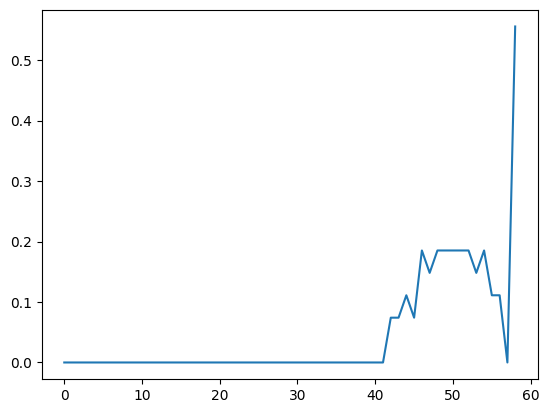

In [ ]:
plt.plot(error_rates)
optimal = np.argmin(error_rates)
optimal